In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
pd.__version__
import seaborn as sns

In [6]:
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )

# Function to remove dublicates from labels.

In [7]:
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen
        
label_list = uniquify(df_labels)

In [8]:
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [10]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


# Changing the label col from object to numbers.

In [11]:
df.iloc[:,-1].unique()
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)

for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

# Checking for NA

In [12]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    if n_miss.iloc[col] != 0:
        print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))
# No NA in dataset.

* Do we have to normalize all data?

# Summary statistics: 

* The first column correspond to the index of the subject. (1 - 40)
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

Ide:
 * Group by subject
 * Group by Activity 
 * Filter( string detect (median | mean | std) opmærksom på at "fil" findes med de samme.

In [13]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1


# Visualization:

In [14]:
df_labels#.pivot(columns = 0)

,0
0,Subject index (1-40)
1,ECG_original_mean
2,ECG_original_std
3,ECG_original_trimmean25
4,ECG_original_median
...,...
530,EDA_Functionals_power_Filt2geomean(abs)
531,EDA_Functionals_power_Filt2harmmean
532,EDA_Functionals_power_Filt2mad
533,EDA_Functionals_power_Filt2baseline


<AxesSubplot:>

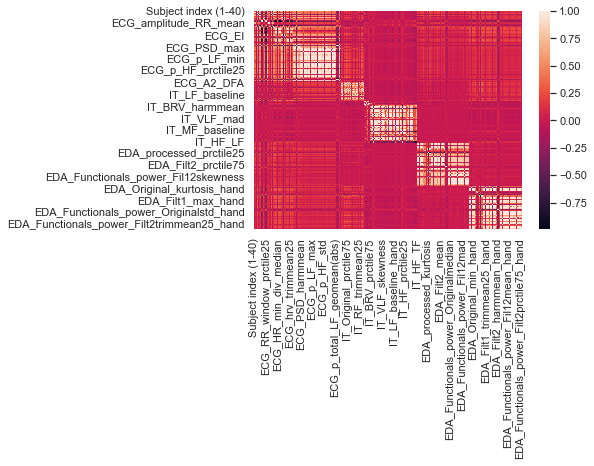

In [48]:
df_heat = df.drop(df.select_dtypes(include = ['object']),axis = 1)
df_heat_corr = df_heat.corr()
sns.set_theme()
sns.heatmap(df_heat_corr)


In [101]:
from sklearn.model_selection import train_test_split
data = df.values
idx = [col for col in range(data.shape[1]) if col != 534]
y = df.iloc[:,534]
X = df.iloc[:,idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_test

157     2
4104    2
1018    1
1117    4
731     3
       ..
605     2
2181    2
2370    1
3845    3
4204    3
Name: Activity, Length: 896, dtype: object

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(random_state=42)
rf_cls

RandomForestClassifier(random_state=42)

In [105]:
import numpy as np
from sklearn.model_selection import cross_val_score

estimator_range = range(10, 310, 10)

rmse_scores = []

for estimator in estimator_range:
    rf_cls = RandomForestClassifier(n_estimators=estimator, random_state=42)
    mse_scores = cross_val_score(rf_reg, 
                                 X_train, 
                                 y_train, 
                                 scoring='neg_mean_squared_error',
                                 n_jobs=1, 
                                 cv=5)
    
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))
    print('Testing',estimator, '/300 estimators')

Testing 10 /300 estimators
Testing 20 /300 estimators
Testing 30 /300 estimators
Testing 40 /300 estimators
Testing 50 /300 estimators
Testing 60 /300 estimators
Testing 70 /300 estimators
Testing 80 /300 estimators
Testing 90 /300 estimators
Testing 100 /300 estimators
Testing 110 /300 estimators
Testing 120 /300 estimators
Testing 130 /300 estimators
Testing 140 /300 estimators
Testing 150 /300 estimators
Testing 160 /300 estimators
Testing 170 /300 estimators
Testing 180 /300 estimators
Testing 190 /300 estimators
Testing 200 /300 estimators
Testing 210 /300 estimators
Testing 220 /300 estimators
Testing 230 /300 estimators
Testing 240 /300 estimators
Testing 250 /300 estimators
Testing 260 /300 estimators
Testing 270 /300 estimators
Testing 280 /300 estimators
Testing 290 /300 estimators
Testing 300 /300 estimators


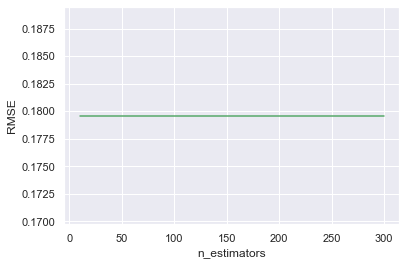

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
n_estimators = range(10, 310, 10)
plt.plot(n_estimators, rmse_scores, 'g')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.show()

In [107]:
x = sorted(zip(rmse_scores, n_estimators))
err, num_est = x[0]
print('Minimum error is {} and its corresponding number of estimators is {}.'.format(err, num_est))

Minimum error is 0.17959804985691552 and its corresponding number of estimators is 10.


In [109]:
feature_range = range(1, 100)
rmse_scores_feat = []

for feature in feature_range:
    rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=feature, random_state=42)
    mse_scores_feat = cross_val_score(rf_reg, 
                                 X_train, 
                                 y_train, 
                                 scoring='neg_mean_squared_error',
                                 n_jobs=1, 
                                 cv=5)
    rmse_scores_feat.append(np.mean(np.sqrt(-mse_scores_feat)))
    print(feature, '/100 features tested')

1 /100 features tested
2 /100 features tested
3 /100 features tested
4 /100 features tested
5 /100 features tested
6 /100 features tested
7 /100 features tested
8 /100 features tested
9 /100 features tested
10 /100 features tested
11 /100 features tested
12 /100 features tested
13 /100 features tested
14 /100 features tested
15 /100 features tested
16 /100 features tested
17 /100 features tested
18 /100 features tested
19 /100 features tested
20 /100 features tested
21 /100 features tested
22 /100 features tested
23 /100 features tested
24 /100 features tested
25 /100 features tested
26 /100 features tested
27 /100 features tested
28 /100 features tested
29 /100 features tested
30 /100 features tested
31 /100 features tested
32 /100 features tested
33 /100 features tested
34 /100 features tested
35 /100 features tested
36 /100 features tested
37 /100 features tested
38 /100 features tested
39 /100 features tested
40 /100 features tested
41 /100 features tested
42 /100 features tested
4

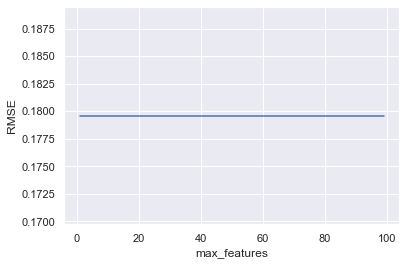

In [110]:
import matplotlib.pyplot as plt
plt.plot(feature_range, rmse_scores_feat, 'b')
plt.xlabel('max_features')
plt.ylabel('RMSE')
plt.show()

In [111]:
x = sorted(zip(rmse_scores_feat, feature_range))
err_feat, max_feat = x[0]
print('Minimum error is {} and its corresponding maximum number of features is {}.'.format(err_feat, max_feat))

Minimum error is 0.17959804985691552 and its corresponding maximum number of features is 1.


In [124]:
rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, random_state=42)
rf_cls.fit(X_train, y_train)
train_score = rf_cls.score(X_train, y_train)
test_score = rf_cls.score(X_test, y_test)
print('Train score: ',train_score, ' Test score: ',test_score)

Train score:  0.9988839285714286  Test score:  0.9196428571428571


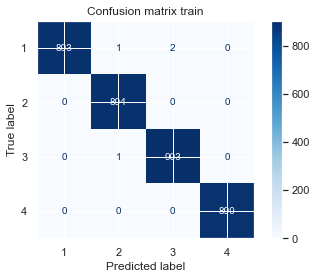

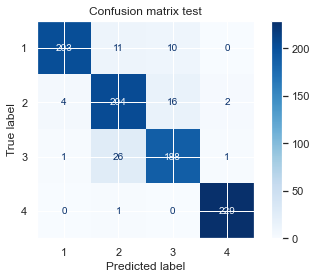

In [125]:
from sklearn import metrics

disp_train = metrics.plot_confusion_matrix(rf_cls, X_train, y_train, 
                                    cmap = plt.cm.Blues)
disp_train.ax_.set_title('Confusion matrix train')

disp_test = metrics.plot_confusion_matrix(rf_cls, X_test, y_test, 
                                    cmap = plt.cm.Blues)
disp_test.ax_.set_title('Confusion matrix test')
plt.show()

Accuracy: 0.920
Confusion matrix:
[[203  11  10   0]
 [  4 204  16   2]
 [  1  26 188   1]
 [  0   1   0 229]]
              precision    recall  f1-score   support

           1       0.98      0.91      0.94       224
           2       0.84      0.90      0.87       226
           3       0.88      0.87      0.87       216
           4       0.99      1.00      0.99       230

    accuracy                           0.92       896
   macro avg       0.92      0.92      0.92       896
weighted avg       0.92      0.92      0.92       896



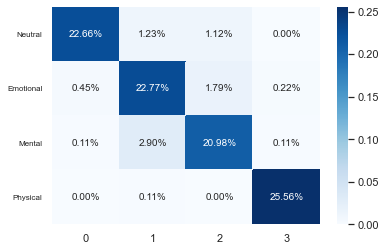

In [126]:

pred = rf_cls.predict(X_test)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test.values.ravel(), pred)

print(conf)

y_axis_labels = ['Neutral','Emotional','Mental','Physical'] # labels for y-axis

g=sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)


print(metrics.classification_report(y_test.values.ravel(), pred))

In [16]:
%%capture
pip install keras

In [17]:
%%capture
pip install tensorflow

In [102]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [96]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [103]:
print(X_train.shape)

(3584, 534)


In [104]:
import keras
from keras.layers import Dense, Activation, Conv1D, BatchNormalization

model = keras.Sequential()
model.add(Conv1D(filters= 32, kernel_size=3, strides=1, kernel_initializer='uniform', input_shape = [3584, 534, 1]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1, center=True, scale=True))

model.add(Conv1D(filters= 32, kernel_size=3, strides=1, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1, center=True, scale=True))

model.add(Conv1D(filters= 64, kernel_size=3, strides=2, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1, center=True, scale=True))
          
model.add(Conv1D(filters= 128, kernel_size=3, strides=3, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1, center=True, scale=True))

model.add(Dense(64, kernel_initializer='uniform'))
model.add(Activation('relu'))
          
model.add(Dense(32, kernel_initializer='uniform'))
model.add(Activation('relu'))
          
model.add(Dense(16, kernel_initializer='uniform'))
model.add(Activation('relu'))
          
model.add(Dense(8, kernel_initializer='uniform'))
model.add(Activation('relu'))
          
model.add(Dense(4, kernel_initializer='uniform'))
model.add(Activation('softmax'))
#neural networks train fast if the distribution of the input data remains similar over time. 
#Batch Normalization helps you do this by doing two things: 
#normalizing the input value and scaling and shifting it.

In [105]:
model.compile(
    loss  = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [106]:
model.fit(
    X_train, y_train,
    batch_size = 10,
    epochs = 20,
    validation_split = 0.2
)

Epoch 1/20


ValueError: in user code:

    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_20 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 534)


In [70]:
score_tr = model.evaluate(X_train, y_train)
score_ts = model.evaluate(X_test, y_test)
print("Training accuracy is: {}".format(score_tr[1]))
print("Test accuracy is: {}".format(score_ts[1]))

ValueError: in user code:

    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/Oliverkew/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_15 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (32, 534)
